# Cool project

First import stuff & libraires

In [227]:
from dataclasses import dataclass

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly

## Partie 1 : Statistiques Descriptives
Initialisons un vecteur avec les points bidimensionnels donnés

In [42]:
data = pd.DataFrame(
    [
        (1, 1),
        (1, 2),
        (1, 5),
        (3, 4),
        (4, 3),
        (6, 2),
        (0, 4)
    ],
    columns=['x', 'y']
)
data

,x,y
0,1,1
1,1,2
2,1,5
3,3,4
4,4,3
5,6,2
6,0,4


### 1. Calculs statistiques

In [99]:
def calculs_stats(df: pd.DataFrame) -> str:
    '''Compute descriptive statistical data on a mono-dimensionnal array'''
    
    return f'''\
Moyenne: {np.mean(df):.3f}
Médiane: {np.median(df)}
Variance: {np.var(df):.3f}
Écart-type: {np.std(df):.3f}

Min: {(min_v := np.min(df))}
Max: {(max_v := np.max(df))}

Étendue: {max_v - min_v}\
'''

On observe quelques statistiques descriptives pour x...

In [96]:
print(calculs_stats(data['x']))

Moyenne: 2.286
Médiane: 1.0
Variance: 3.918
Écart-type: 1.979

Min: 0
Max: 6

Étendue: 6


Puis pour y

In [98]:
print(calculs_stats(data['y']))

Moyenne: 3.000
Médiane: 3.0
Variance: 1.714
Écart-type: 1.309

Min: 1
Max: 5

Étendue: 4


### 2. Visualisation

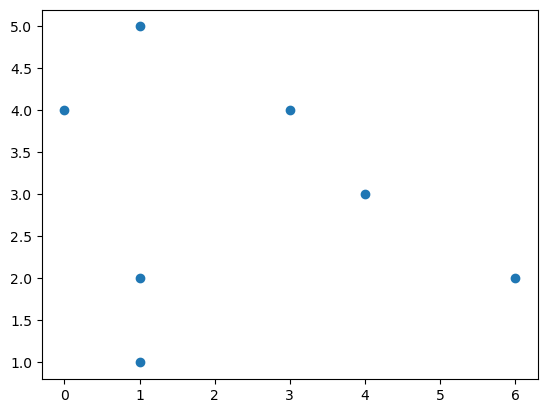

In [152]:
plt.scatter(data['x'], data['y'])
plt.show()

### 3. Interprétation

idk

## Partie 2 : Régression Linéaire Simple
Nous allons explorer s'il existe une relation linéaire entre les coordonnées x et y des points.
### 1. Calcul des Coefficients de Régression

In [142]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])

b1_upper = np.sum((data['x'] - x_mean) * (data['y'] - y_mean))
b1_lower = np.sum((data['x'] - x_mean) ** 2)
b1 = b1_upper / b1_lower

print(f'b1 = {b1:.5f}')

b1 = -0.14583


In [144]:
b0 = y_mean - b1 * x_mean
print(f'b0 = {b0:.5f}')

b0 = 3.33333


On peut comparer nos résultats à ceux de la librairie `numpy`

In [188]:
b0, b1 = poly.polyfit(data['x'], data['y'], 1)

print(f'b1 = {b1:.5f} et b0 = {b0:.5f}')

b1 = -0.14583 et b0 = 3.33333


On retrouve bien les mêmes résultats
### 2. Visualisation de la Droite de Régression

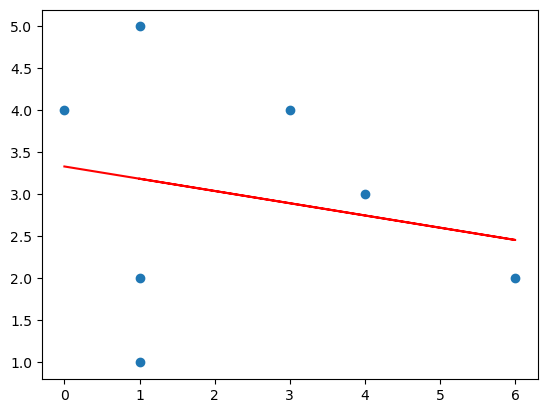

In [156]:
y_regr = b0 + b1 * data['x']

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], y_regr, color='red')
plt.show()

### 3. Coefficient de Détermination R²

In [158]:
SCE = np.sum((data['y'] - y_regr) ** 2)
SCT = np.sum((data['y'] - y_mean) ** 2)
SCR = np.sum((y_regr - y_mean) ** 2)

In [165]:
R_2 = 1 - SCE / SCT
print(f'R_2 = {R_2:.5f}')

R_2 = 0.04861


On vérifie aussi que $R^2$ est identique pour la second formule

In [170]:
print(f'SCR/SCT = {SCR / SCT:.5f}')

SCR/SCT = 0.04861


On obtient bel et bien la même chose

In [198]:
R = np.corrcoef(data['x'], data['y'])[0,1]
print(f'R_2 = {R*R:.5f}')

R_2 = 0.04861


Et la librairie `numpy` nous retourne le même résultat via [corrcoef](https://numpy.org/doc/2.2/reference/generated/numpy.corrcoef.html)

## Partie 3 : Estimation de l'erreur en régression linéaire simple
### 1. Résidus et somme des carrés des erreurs (SCE)

In [200]:
SCE = np.sum((data['y'] - y_regr) ** 2)
print(f'SCE = {SCE:.5f}')

SCE = 11.41667


Blabla

### 2. Estimation de la variance des erreurs : MSE

In [206]:
MSE = SCE / (len(data) - 2)
print(f'MSE = {MSE:.5f}')

MSE = 2.28333


Blabla, pk `n-2` ?

### 3. Écart-type des erreurs

In [208]:
s = np.sqrt(MSE)
print(f'Écart-type des erreurs = {s:.5f}')

Écart-type des erreurs = 1.51107


### 4. Interprétation des Résultats

blablabla

## Partie 4 : Régression Linéaire Simple avec Tests Statistiques
### 1. Estimation de la Variance des Erreurs

???

### 2. Erreurs Standards des Coefficients

In [212]:
SE_b1 = s / np.sqrt(np.sum((data['x'] - x_mean) ** 2))
print(f'SE_b1 = {SE_b1:.5f}')

SE_b1 = 0.28852


In [214]:
SE_b0 = s * np.sqrt( (1 / len(data)) + (x_mean ** 2) / np.sum((data['x'] - x_mean) ** 2) )
print(f'SE_b0 = {SE_b0:.5f}')

SE_b0 = 0.87242


### 3. Test d'Hypothèse pour la Pente (b₁)

In [216]:
t = b1 / SE_b1
print(f't = {t:.5f}')

t = -0.50544


# TODO

## Partie 5 : Classification Ascendante Hiérarchique (CAH)
### Question 1

In [238]:
@dataclass
class Coords:
    '''Coordonées d\'un point'''
    
    x: np.int64
    y: np.int64

In [236]:
def dist(i: Coords, j: Coords) -> np.float64:
    '''Calcule la distance euclidienne séparant deux points'''
    
    return np.sqrt( (i.x - j.x)**2 + (i.y - j.y)**2 )

In [239]:
def dist1(i: Coords, j: Coords) -> np.float64:
    ''' cc '''

    return abs(i.x - j.x) + abs(i.y - j.y)

In [248]:
def dist_inf(i: Coords, j: Coords) -> np.float64:
    ''' cc '''

    return np.max((abs(i.x - j.x), abs(i.y - j.y)))

Blabla

### Question 2

In [250]:
def dist_min(t: np.DataFrame) -> tuple[Coords, Coords]:
    ...

AttributeError: module 'numpy' has no attribute 'DataFrame'